In [1]:
import pandas as pd

from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostRegressor,
    RandomForestRegressor
) 

from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt

from lemma_tokenizer import LemmaTokenizer
from prepare_dataset import process_data

In [12]:
#import nltk
#nltk.download('wordnet')
!pip list

Package                Version
---------------------- -------------------
absl-py                0.9.0
anaconda-client        1.7.2
anaconda-navigator     1.9.12
argon2-cffi            20.1.0
astor                  0.8.1
async-generator        1.10
attrs                  20.3.0
backcall               0.2.0
beautifulsoup4         4.9.3
bleach                 3.2.1
blis                   0.4.1
boto3                  1.16.52
botocore               1.19.52
brotlipy               0.7.0
catalogue              1.0.0
certifi                2020.11.8
cffi                   1.14.4
chardet                3.0.4
click                  7.1.2
clyent                 1.2.2
colorama               0.4.4
conda                  4.9.2
conda-build            3.17.8
conda-package-handling 1.7.2
conda-verify           3.1.1
cryptography           3.3.1
cycler                 0.10.0
cymem                  2.0.3
dataclasses            0.6
de-core-news-sm        2.3.0
decorator              4.4.2
defusedxml      

You should consider upgrading via the 'e:\programme\anaconda3\python.exe -m pip install --upgrade pip' command.



termcolor              1.1.0
terminado              0.9.2
test-tube              0.7.5
testpath               0.4.4
thinc                  7.4.1
threadpoolctl          2.1.0
tokenizers             0.8.1rc1
torch                  1.1.0
torchaudio             0.7.2
torchtext              0.4.0
torchvision            0.8.2
tornado                6.1
tqdm                   4.55.1
traitlets              5.0.5
transformers           4.3.3
typing-extensions      3.7.4.3
urllib3                1.26.2
wasabi                 0.7.1
wcwidth                0.2.5
webencodings           0.5.1
Werkzeug               1.0.1
widgetsnbextension     3.5.1
win-inet-pton          1.1.0
wincertstore           0.2
wrapt                  1.12.1
xmltodict              0.12.0
zipp                   3.4.0


In [3]:
metrics = ["MAE", "RMSE", "R2", "Time"]
result_metrics = []
seed = 0

In [4]:
def evaluate_model(results:list, labels:list, decimal = 3) -> list:
    mae = mean_absolute_error(y_test, results)
    mse = mean_squared_error(y_test, results, squared = True)
    r2 = r2_score(y_test, results)
    
    return round(mae, decimal), round(mse, decimal), round(r2, decimal)

def get_model_name(model_type:str) -> str:
    
    if type(model_type) is not str:
        model_type = str(model_type)
        
    split = model_type.split("(")
    name = split[0]
    return name

def correlation_graph(results:list, 
                      labels:list, 
                      title:str,
                      colors = [(0.1, 0.2, 0.5),  (0.5, 0.2, 0.2)],
                      xlim:list = [75, 100],
                      legend = ["Results", "Labels"]):

    fig, ax = plt.subplots()
    values = [results, labels]
    
    
    for i in range(len(values)):
        sns.histplot(values[i], bins=range(75, 100, 1), ax=ax, color = colors[i], label = legend[i])
        
    ax.set_xlim(xlim)
    ax.set_title(title)
    ax.legend()
    
    return fig, ax

## Create Dataset

In [5]:
quantile_cut = {"price" : 0.99}
to_one_hot_encode = ["taster_name", "country"]
drop_duplicates = ['description','title']
fill_mean = ["price"]

X_train, X_test, y_train, y_test = process_data(load_dir = "dataset_sampled.csv", 
                                               label_column = "points", 
                                               text_column = "description", 
                                               quantile_cut = quantile_cut,
                                               to_one_hot_encode = to_one_hot_encode,
                                               drop_duplicates = drop_duplicates,
                                               fill_mean = ["price"],
                                               tf_idf_cutoff = 0,
                                               normalize = True,
                                               nlp_tool = None,
                                               tokenizer = LemmaTokenizer())
X_train

E:\Programme\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,price,taster_name_Alexander Peartree,taster_name_Anna Lee C. Iijima,taster_name_Anne Krebiehl MW,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Jeff Jenssen,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Kerin O’Keefe,...,9165,9166,9167,9168,9169,9170,9171,9172,9173,9174
7112,-0.246321,0,0,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
4127,-0.114105,0,0,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
2535,-0.642967,0,1,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
3380,1.208050,0,0,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
8548,-0.554823,0,1,0,0,0,0,0,0,0,...,-1.981564,-1.981617,-1.981319,-1.981784,-1.981732,-1.980524,-1.981658,-1.981784,-1.981624,-1.981535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.075835,0,0,1,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
7891,0.987691,0,0,0,0,0,0,0,0,0,...,-1.981564,-1.981617,-1.981319,-1.981784,-1.981732,-1.980524,-1.981658,-1.981784,-1.981624,-1.981535
4859,-0.202249,0,1,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072
3264,1.208050,0,0,0,0,0,0,0,0,0,...,0.504232,0.504292,0.503647,0.504596,0.504476,0.502068,0.504331,0.504596,0.504369,0.504072


In [6]:
quantile_cut = {"price" : 0.99}
to_one_hot_encode = ["taster_name", "country"]
drop_duplicates = ['description','title']
fill_mean = ["price"]

X_train, X_test, y_train, y_test = process_data(load_dir = "dataset_sampled.csv", 
                                               label_column = "points", 
                                               text_column = "description", 
                                               quantile_cut = quantile_cut,
                                               to_one_hot_encode = to_one_hot_encode,
                                               drop_duplicates = drop_duplicates,
                                               fill_mean = ["price"],
                                               normalize = True,
                                               nlp_tool = None)
X_train

,price,taster_name_Alexander Peartree,taster_name_Anna Lee C. Iijima,taster_name_Anne Krebiehl MW,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Jeff Jenssen,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Kerin O’Keefe,...,country_Portugal,country_Romania,country_Serbia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Uruguay
7112,-0.246321,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4127,-0.114105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2535,-0.642967,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3380,1.208050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8548,-0.554823,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.075835,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7891,0.987691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4859,-0.202249,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,1.208050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Training time: 0.05 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for SVR'}, xlabel='points', ylabel='Count'>)

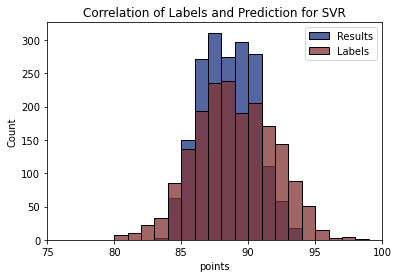

In [7]:
now = datetime.now()
model = SVR(C=1.0, epsilon=0.2)
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.0 min


E:\Programme\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for LogisticRegression'}, xlabel='points', ylabel='Count'>)

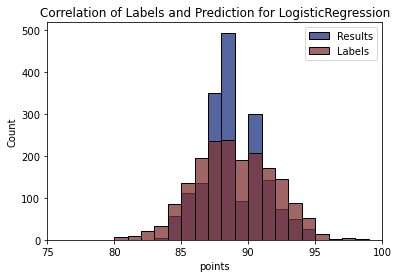

In [8]:
now = datetime.now()

model = LogisticRegression(random_state = seed)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.0 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for AdaBoostRegressor'}, xlabel='points', ylabel='Count'>)

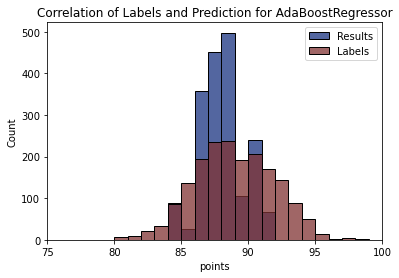

In [9]:
now = datetime.now()

model = AdaBoostRegressor(random_state=seed, n_estimators=100)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

Training time: 0.0 min


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlation of Labels and Prediction for RandomForestRegressor'}, xlabel='points', ylabel='Count'>)

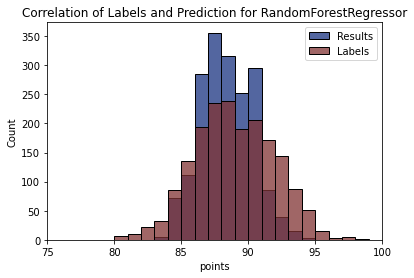

In [10]:
now = datetime.now()

model = RandomForestRegressor(max_depth=10, random_state=seed)
model.fit(X_train, y_train)
time_delta = (datetime.now()-now).seconds/60
print(f"Training time: {time_delta} min")

results = model.predict(X_test)
performance = evaluate_model(results, y_test)
performance +=  tuple([time_delta])
result_metrics.append(tuple([get_model_name(model)]) + performance)

correlation_graph(results, y_test, f"Correlation of Labels and Prediction for {get_model_name(model)}")

In [11]:
##tf-idfcutoff 0, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.334,8.190,0.063,6.683333
1,LogisticRegression,1.923,6.079,0.304,0.333333
2,AdaBoostRegressor,1.982,6.035,0.309,2.850000
3,RandomForestRegressor,1.845,5.421,0.379,7.633333


In [57]:
###bow, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.341,8.244,0.056,7.550000
1,LogisticRegression,2.014,6.648,0.239,0.416667
2,AdaBoostRegressor,1.959,5.880,0.327,2.266667
3,RandomForestRegressor,1.836,5.365,0.386,8.800000


In [48]:
#No NLP, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.779,5.083,0.418,0.05
1,LogisticRegression,1.905,5.940,0.320,0.00
2,AdaBoostRegressor,1.947,5.805,0.335,0.00
3,RandomForestRegressor,1.806,5.203,0.404,0.00


In [39]:
#No NLP, Not Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.876,5.623,0.356,0.050000
1,LogisticRegression,1.929,6.054,0.307,0.016667
2,AdaBoostRegressor,1.947,5.805,0.335,0.000000
3,RandomForestRegressor,1.806,5.200,0.405,0.000000


In [19]:
##tf-idf cutoff = 0.001, Scaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,2.202,7.285,0.166,1.750000
1,LogisticRegression,1.940,6.104,0.301,0.083333
2,AdaBoostRegressor,1.985,6.027,0.310,0.883333
3,RandomForestRegressor,1.844,5.421,0.380,1.983333


In [9]:
##tf-idfcutoff = 0.005, Unscaled
pd.DataFrame(result_metrics, columns = ["Model"] + metrics)

,Model,MAE,RMSE,R2,Time
0,SVR,1.876,5.617,0.357,0.100000
1,LogisticRegression,1.974,6.379,0.270,0.016667
2,AdaBoostRegressor,1.963,5.934,0.321,0.000000
3,RandomForestRegressor,1.838,5.384,0.384,0.066667
